# **Exploratory Data Analysis (EDA)**

## Objectives

This notebook aims to use **Exploratory Data Analysis (EDA)** to explore, and understand the dataset and its existing patterns and trends. The EDA process aims to:
- Conduct descriptive analysis of the data
- Generate and refine features in features engineering
- Test hypothesis using statistical tests
- Generate visualisation to display trends
- Gather insights on data that answers business requirements


## Prerequisites
- Python 3.12.8 is installed
- Required Python Libaries from `requirements.txt` and their dependencies must be installed
- Optional to set up Python virtual enviornment
- Completed ETL step

## Inputs

- Cleaned dataset from ETL `cleaned_heart_data.csv`.

## Initial hypothesis
- Older individuals are more likely to develope cardiovascular disease (CVD)
- Males are more likely to develope CVD than females
- High blood pressure increase the likelihood of developing CDV
- High cholesterol individuals are more likely to have CDV
- Physically active individuals are less likely to have CDV
- Smokers are more likely to have CDV
- Alcohol consumption increase the likelyhood of developing CDV

## Outputs

- Generated insights and tested hypothesis
- Data visualisations created using matplotlib, seaborn and plotly

## Additional Comments

- If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

The working directory must be changed from its current folder to its parent folder
* The current directory can be accessed with `os.getcwd()`

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/analysis-of-risk-factors-for-cardiovascular-diseases/jupyter_notebooks'

The parent of the current directory will be the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/analysis-of-risk-factors-for-cardiovascular-diseases'

---

# Initial Setup

### Import Libaries

Essential data analysis and visualisation libaries are imported.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Extract Dataset

Extract the cleaned csv file as a pandas DataFrame

In [6]:
'''Read the raw data and create a copy of the original data'''
df = pd.read_csv('data/cleaned/cleaned_heart_data.csv') # Cleaned data directory
df_original =df.copy()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


---

# EDA: Features Engineering and Descriptive Analysis

## Data type conversion
A basic summary of the DataFrame is generated using `.info()`. Although the data types of categorical data were changed in the previous ETL notebooks, they have reverted back to integer data types. This is because the actural values of those rows were not replaced, so when the saved csv file is read, it gets assigned to an integer data type.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68612 entries, 0 to 68767
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           68612 non-null  int64   
 1   age          68612 non-null  int64   
 2   gender       68612 non-null  category
 3   height       68612 non-null  int64   
 4   weight       68612 non-null  float64 
 5   ap_hi        68612 non-null  int64   
 6   ap_lo        68612 non-null  int64   
 7   cholesterol  68612 non-null  category
 8   gluc         68612 non-null  category
 9   smoke        68612 non-null  category
 10  alco         68612 non-null  category
 11  active       68612 non-null  category
 12  cardio       68612 non-null  category
 13  pp           68612 non-null  int64   
 14  bmi          68612 non-null  float64 
 15  age_years    68612 non-null  int64   
dtypes: category(7), float64(2), int64(7)
memory usage: 7.7 MB


The integer values of `gender`, `cholesterol`, `gluc`, smoke, alco, active and cardio are replaced with string variables representing the same thing. The rows are then converted to category data types.

In [40]:
'''Replace integer values with descriptive names and convert to category data type'''#
catago_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

df['gender'].replace({1: 'Male', 2: 'Female'}, inplace=True)
df['cholesterol'].replace({1: 'Normal', 2: 'High', 3: 'Very high'}, inplace=True)
df['gluc'].replace({1: 'Normal', 2: 'High', 3: 'Very high'}, inplace=True)
df['smoke'].replace({0: 'Non-smoker', 1: 'Smoker'}, inplace=True)
df['alco'].replace({0: 'Non-drinker', 1: 'Drinker'}, inplace=True)
df['active'].replace({0: 'Inactive', 1: 'Active'}, inplace=True)
df['cardio'].replace({0: 'No CVD', 1: 'CVD'}, inplace=True)

for col in catago_cols:
    df[col] = df[col].astype('category')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi,age_years
0,0,18393,Female,168,62.0,110,80,Normal,Normal,Non-smoker,Non-drinker,Active,No CVD,30,21.97,50
1,1,20228,Male,156,85.0,140,90,Very high,Normal,Non-smoker,Non-drinker,Active,CVD,50,34.93,55
2,2,18857,Male,165,64.0,130,70,Very high,Normal,Non-smoker,Non-drinker,Inactive,CVD,60,23.51,52
3,3,17623,Female,169,82.0,150,100,Normal,Normal,Non-smoker,Non-drinker,Active,CVD,50,28.71,48
4,4,17474,Male,156,56.0,100,60,Normal,Normal,Non-smoker,Non-drinker,Inactive,No CVD,40,23.01,48


Confirm that the data types have been changed to category

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68612 entries, 0 to 68767
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           68612 non-null  int64   
 1   age          68612 non-null  int64   
 2   gender       68612 non-null  category
 3   height       68612 non-null  int64   
 4   weight       68612 non-null  float64 
 5   ap_hi        68612 non-null  int64   
 6   ap_lo        68612 non-null  int64   
 7   cholesterol  68612 non-null  category
 8   gluc         68612 non-null  category
 9   smoke        68612 non-null  category
 10  alco         68612 non-null  category
 11  active       68612 non-null  category
 12  cardio       68612 non-null  category
 13  pp           68612 non-null  int64   
 14  bmi          68612 non-null  float64 
 15  age_years    68612 non-null  int64   
dtypes: category(7), float64(2), int64(7)
memory usage: 7.7 MB


## Feature creation

Pulse pressure, body mass index and age in years were created.

In [42]:
'''Create new features: pulse pressure (pp), body mass index (bmi), age in years (age_years)'''
df['pp'] = df['ap_hi'] - df['ap_lo']
df['bmi'] = (df['weight'] / (df['height']/100)**2).round(2)
df["age_years"] = (df["age"] / 365.25).round().astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi,age_years
0,0,18393,Female,168,62.0,110,80,Normal,Normal,Non-smoker,Non-drinker,Active,No CVD,30,21.97,50
1,1,20228,Male,156,85.0,140,90,Very high,Normal,Non-smoker,Non-drinker,Active,CVD,50,34.93,55
2,2,18857,Male,165,64.0,130,70,Very high,Normal,Non-smoker,Non-drinker,Inactive,CVD,60,23.51,52
3,3,17623,Female,169,82.0,150,100,Normal,Normal,Non-smoker,Non-drinker,Active,CVD,50,28.71,48
4,4,17474,Male,156,56.0,100,60,Normal,Normal,Non-smoker,Non-drinker,Inactive,No CVD,40,23.01,48


Updated Features Description

|Name of feature|Description|Data type|
| ----------- | ----------- | ----------- |
|`id`|Unique identifier assigned to each person|Integer|
|`age`|Age of the person in days|Integer|
|`gender`|Gender of the person|Category|
|`height`|Height of the person in cm|Integer|
|`weight`|Weight of the person in kg|Float|
|`ap_hi`|Systolic blood pressure reading|Integer|
|`ap_lo`|Diastolic blood pressure reading|Integer|
|`cholesterol`|Cholesterol level|Category|
|`gluc`|Glucose level|Category|
|`smoke`|Smoking status|Category|
|`alco`|Alcohol status|Category|
|`active`|Physical activity status|Category|
|`cardio`|Presence of cardiovascular disease|Category|
|`pp`|Pulse pressure|Integer|
|`bmi`|Body Mass Index in kg/m²|Float|
|`age_years`|Age of the person in years|Integer|


## Identifying and handling outliers
Basic distribution of numerical values can be found using `.describe()`. This will be done to the columns with numerical data values. The age demographic of the data consists of adults between 30 to 65 years old.

The descriptive statistics indicate the presence of outliers and errors: 
- Minimum height and weight of 55 cm and 11 kg is implausible considering that the youngest individual in the dataset is 29 years old (10,798 days).
- pulse pressure (pp) can not be negative as Systolic pressure can not be lower than Diastolic pressure. A typical range is 30–60 mmHg but pulse pressure higher than 100 mmHg is possible in individuals with medical conditions.
- Lowest BMI is 3.47 kg/m² which is very likely an error as lowest ever recorded BMI is 6.7 kg/m².
- Highest BMI is 298.67 kg/m² which also seems unlikely.

In [43]:
'''Get a statistical summary of the numerical columns'''
def stat_summary(dataframe):
    desc = dataframe.describe().T
    desc['range'] = desc['max'] - desc['min']
    desc['var'] = dataframe.var()
    desc['skew'] = dataframe.skew()
    desc['kurtosis'] = dataframe.kurtosis()
    cols = ['min', 'max', 'range', 'mean', '50%', 'std', 'var', 'skew', 'kurtosis']
    return desc[cols].round(2)
stat_summary(df.select_dtypes(exclude='category'))

,min,max,range,mean,50%,std,var,skew,kurtosis
id,0.00,99999.0,99999.00,49975.68,50016.50,28844.58,8.320096e+08,-0.00,-1.20
age,10798.00,23713.0,12915.00,19464.32,19701.00,2468.13,6.091687e+06,-0.31,-0.83
height,100.00,250.0,150.00,164.41,165.00,7.94,6.306000e+01,0.00,1.06
weight,28.00,200.0,172.00,74.09,72.00,14.21,2.020200e+02,0.94,2.04
ap_hi,60.00,240.0,180.00,126.67,120.00,16.68,2.780900e+02,0.93,1.83
ap_lo,30.00,150.0,120.00,81.29,80.00,9.43,8.901000e+01,0.30,1.64
pp,10.00,140.0,130.00,45.37,40.00,11.67,1.362300e+02,1.32,3.59
bmi,10.73,60.0,49.27,27.45,26.35,5.21,2.716000e+01,1.19,2.43
age_years,30.00,65.0,35.00,53.29,54.00,6.76,4.573000e+01,-0.31,-0.82


There are 86 entries with negative pulse pressure values. Since these results are impossible, they will be removed from the dataset.

In [44]:
df[df['pp'] < 0]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi,age_years


Pulse pressure of 0 is impossible, and any pulse pressure below 10 is implausable. A pulse pressure of less than 25 mmHg is already considered to be dangerously low and requires medical evaluation.

In [45]:
df[df['pp']<10]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi,age_years


In [46]:
'''Removing entries with negative pulse pressure values and implausibly low pulse pressure values'''
df = df[df['pp'] >= 10]
df.shape

(68612, 16)

The extremely low BMI Values are likely due to incorrect weight measurements. Its unrealistic for adults to have weights of below 30 kg, especially considering the height of the entries. 

In [47]:
df[df['bmi']<10]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi,age_years


A BMI above 40 kg/m² is classified as [class III (severe) obesity](https://www.nhs.uk/conditions/obesity/). Values exceeding 60 kg/m² are more likely the result of data entry errors rather than genuine outliers. Upon inspecting these abnormally high BMI values, many entries have heights below 100 cm, which is highly unlikely for adults, even for individuals with restricted growth conditions. This further supports the idea that the high BMI values are likely caused by incorrect height or weight measurements and should be removed.

In [48]:
'''Inspecting extremely high BMI values'''
df[df['bmi']>60].sort_values(by='bmi')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi,age_years


To maintain data quality, BMI values were limited to the range 10–60. This removes implausible entries likely due to data errors while preserving plausible extreme values. Values beyond this range are unrealistic for adults aged 30–65.

In [49]:
'''Removing BMI outliers'''
df = df[(df['bmi'] <= 60) & (df['bmi'] >= 10)]
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi,age_years
0,0,18393,Female,168,62.0,110,80,Normal,Normal,Non-smoker,Non-drinker,Active,No CVD,30,21.97,50
1,1,20228,Male,156,85.0,140,90,Very high,Normal,Non-smoker,Non-drinker,Active,CVD,50,34.93,55
2,2,18857,Male,165,64.0,130,70,Very high,Normal,Non-smoker,Non-drinker,Inactive,CVD,60,23.51,52
3,3,17623,Female,169,82.0,150,100,Normal,Normal,Non-smoker,Non-drinker,Active,CVD,50,28.71,48
4,4,17474,Male,156,56.0,100,60,Normal,Normal,Non-smoker,Non-drinker,Inactive,No CVD,40,23.01,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68763,99993,19240,Female,168,76.0,120,80,Normal,Normal,Smoker,Non-drinker,Active,No CVD,40,26.93,53
68764,99995,22601,Male,158,126.0,140,90,High,High,Non-smoker,Non-drinker,Active,CVD,50,50.47,62
68765,99996,19066,Female,183,105.0,180,90,Very high,Normal,Non-smoker,Drinker,Inactive,CVD,90,31.35,52
68766,99998,22431,Male,163,72.0,135,80,Normal,High,Non-smoker,Non-drinker,Inactive,CVD,55,27.10,61


Whilst heights of below 130 cm seems unlikely in adults, it is plausable for thoses with [restricted growth conditions](https://www.nhs.uk/conditions/restricted-growth/). Therefore these entries will be kept. 

In [50]:
'''Inspecting extremely low height values'''
(df[df['height']<130]
 .select_dtypes(exclude='category')
 .describe()
 .round(2)
 )

,id,age,height,weight,ap_hi,ap_lo,pp,bmi,age_years
count,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00
mean,57050.67,18853.70,118.24,72.70,120.65,77.39,43.26,52.27,51.54
std,29288.79,2607.13,5.13,11.98,9.04,7.13,6.34,8.95,7.11
min,5278.00,14445.00,100.00,28.00,100.00,60.00,40.00,17.09,40.00
25%,33591.50,17071.75,120.00,70.00,120.00,70.00,40.00,54.52,46.50
50%,64626.00,18976.00,120.00,80.00,120.00,80.00,40.00,55.56,52.00
75%,82360.75,20693.75,120.00,80.00,120.00,80.00,40.00,55.56,56.75
max,98630.00,23422.00,128.00,80.00,150.00,90.00,60.00,60.00,64.00


Load Transformed Data

In [51]:
'''Save dataframe as CSV'''
df.to_csv('data/processed/processed_heart_data.csv', index=False)

## Descriptive Analysis

A statistical summary of the numerical features shows that most variables have acceptable skew and kurtosis values. Pulse pressure, however, shows a slightly high kurtosis, suggesting some outliers still present.

In [52]:
'''Statistical summary of numerical values after outlier removal'''
stat_summary(df.select_dtypes(exclude='category'))

,min,max,range,mean,50%,std,var,skew,kurtosis
id,0.00,99999.0,99999.00,49975.68,50016.50,28844.58,8.320096e+08,-0.00,-1.20
age,10798.00,23713.0,12915.00,19464.32,19701.00,2468.13,6.091687e+06,-0.31,-0.83
height,100.00,250.0,150.00,164.41,165.00,7.94,6.306000e+01,0.00,1.06
weight,28.00,200.0,172.00,74.09,72.00,14.21,2.020200e+02,0.94,2.04
ap_hi,60.00,240.0,180.00,126.67,120.00,16.68,2.780900e+02,0.93,1.83
ap_lo,30.00,150.0,120.00,81.29,80.00,9.43,8.901000e+01,0.30,1.64
pp,10.00,140.0,130.00,45.37,40.00,11.67,1.362300e+02,1.32,3.59
bmi,10.73,60.0,49.27,27.45,26.35,5.21,2.716000e+01,1.19,2.43
age_years,30.00,65.0,35.00,53.29,54.00,6.76,4.573000e+01,-0.31,-0.82


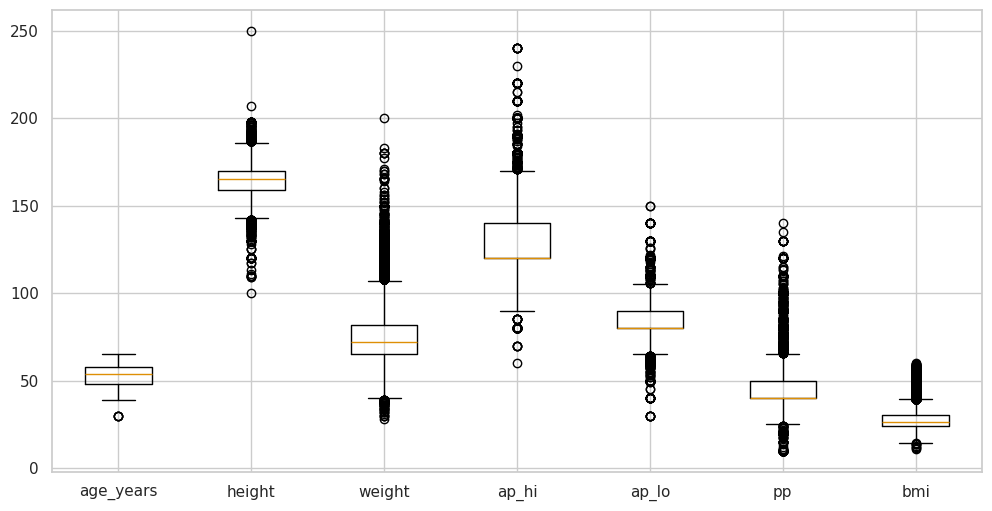

In [22]:
''' Plot boxplots for numerical features to visualize distributions'''
numeric_cols = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'pp', 'bmi']
list_of_data = []
plt.figure(figsize=(12,6))
for col in numeric_cols:
  list_of_data.append(df[col])

plt.boxplot(x=list_of_data)
plt.xticks(np.arange(1,len(numeric_cols)+1), numeric_cols)
plt.show()

In [53]:
'''Get the distribution of categorical columns and put into a dataframe'''
stats = []
for col in df.select_dtypes(include='category').columns:
    counts = df[col].value_counts()
    percents = df[col].value_counts(normalize=True)* 100
    stat = pd.DataFrame({
        'col': col,
        'value': counts.index, 
        'count': counts.values, 
        'percent': percents.round(2)
        })
    stats.append(stat)

catago_stats = pd.concat(stats).reset_index(drop=True)
catago_stats

,col,value,count,percent
0,gender,Male,44686,65.13
1,gender,Female,23926,34.87
2,cholesterol,Normal,51451,74.99
3,cholesterol,High,9296,13.55
4,cholesterol,Very high,7865,11.46
5,gluc,Normal,58336,85.02
6,gluc,Very high,5212,7.60
7,gluc,High,5064,7.38
8,smoke,Non-smoker,62577,91.20
9,smoke,Smoker,6035,8.80


A brief description of the population of the dataset and its characteristics after removing outliers:
- Total of 68612 individuals
- Population has more males (65.1%) than females (34.9%)
- ≈75% have normal cholesterol levels, others have higher than normal cholesterol levels
- ≈85% have normal glucose levels, others have higher than normal glucose levels
- Majority of the population does not drink or smoke
- ≈80% of the population are physically active
- Roughly half of the population have CVD present

---

# EDA: Visualisation and Hypothesis Testing

Visualisations will be created using matplotlib, seaborn and plotly to show trends and distributions of the data. The following hypotheses will be tested using statistical tests:
1. Older individuals are more likely to develope cardiovascular disease (CVD)
2. Males are more likely to develope CVD than females
3. High blood pressure increase the likelihood of developing CDV
4. High cholesterol individuals are more likely to have CDV
5. Physically active individuals are less likely to have CDV
6. Smokers are more likely to have CDV
7. Alcohol consumption increase the likelyhood of developing CDV

In [21]:
'''Set seaborn theme for all plots'''
sns.set_theme(style="whitegrid", palette="colorblind")

## Hypothesis 1:

>H0: Older individuals does not have a higher chance of having CVD <br>
>H1: Older individuals are more likely to have CVD

In [56]:
from scipy.stats import ttest_ind, shapiro, mannwhitneyu, levene

In [67]:
'''Split age data into two groups based on CVD status'''
age_cvd = df[df['cardio']=='CVD']['age_years']
age_no_cvd = df[df['cardio']=='No CVD']['age_years']

Shapiro-Wilk test is used to test for normality, as both groups gave a p-value much smaller than the significant level of 0.05, normality is rejected and a non parametric statistical test must be used.

In [70]:
'''Test for normality using the Shapiro-Wilk test'''
sample_size = 5000
# Data is sampled to get a size within the limit of the shapiro function
age_sample_cvd = age_cvd.sample(sample_size, random_state=12)
age_sample_no_cvd = age_no_cvd.sample(sample_size, random_state=12)

stat_cvd, p_cvd = shapiro(age_sample_cvd)
stat_no_cvd, p_no_cvd = shapiro(age_sample_no_cvd)

print(f"  CVD group p-value: {p_cvd}")
print(f"  No CVD group p-value: {p_no_cvd}")

  CVD group p-value: 3.960209048002467e-36
  No CVD group p-value: 7.267248793610026e-33


Mann-Whitney test is used to test the null hypothesis:
>H0: Older individuals does not have a higher chance of having CVD

A one-tailed test is used as H1 states "*older* individuals are more likely to have CVD". The resulted p-value is so small that it is rounded to 0.0, meaning it is too small to calculate. H0 is confidently rejected and H1 is accepted, concluding that: 

***Older individuals are more likely to have CVD***


In [ ]:
'''Mann-Whitney U test'''
u_stat, p_value = mannwhitneyu(age_cvd, age_no_cvd, alternative='greater')

print("Mann–Whitney U Test for Age vs CVD")
print(f"U-statistic = {u_stat}")
print(f"p-value = {p_value}")


Mann–Whitney U Test for Age vs CVD
U-statistic = 748951099.0
p-value = 0.0


### Visualisations

Generated visuals also supports that older individuals are more likely to have CVD.

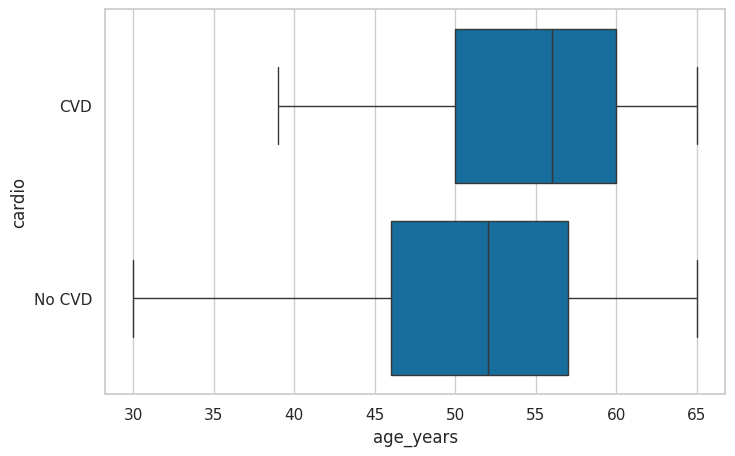

In [92]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='cardio', x='age_years',)
plt.show()

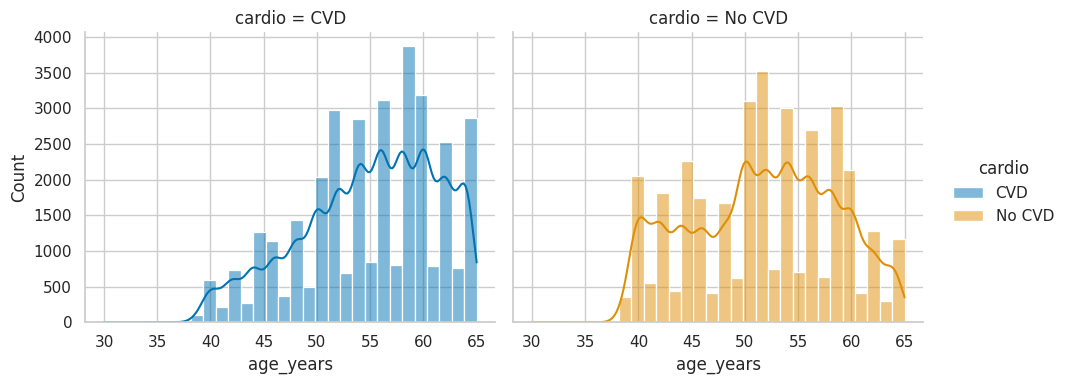

In [90]:
'''Visualize the age distribution for both CVD and No CVD groups'''
sns.displot(
    data=df,
    x="age_years",
    col="cardio",
    hue="cardio",
    bins=30,
    kde=True,
    height=4, aspect=1.2
)
plt.show()

## Hypothesis 2:
>H0: No significant difference in the likelihood of developing CVD between males and females <br>
>H1: Males are more likely to develop CVD than females

In [93]:
from scipy.stats import chi2_contingency

---

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.